<img src="https://static.vecteezy.com/system/resources/previews/002/779/437/original/system-error-concept-programmers-working-with-system-error-illustration-flat-vector.jpg" style="float: left;" width="500" height="500" />

## SYSTEM ERROR ROOT CAUSE PREDICTION  **With Tensorflow**
### Day 23 of 110 Days of ML Challenge
#### Project by Anjolaoluwa (Dataprincess)

**Scenario:**
A data center wants to build a model to predict causes of issues reported by customers. They already have a system monitoring tool to track CPU, Memory, and application latency for all servers. In addition, they also track specific errors reported by applications.

**Problem Statement:**
Using data about CPU load, memory load, network delays, and 3 different types of error, predict the root cause of system errors using a Keras model.

# Approach

- Data preprocessing
- Model building
- Model training
- Model evaluation
- Prediction

# Import required libraries

In [55]:
# Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model Building
import tensorflow as tf
from tensorflow import keras

# Model Evaluation
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('/content/root_cause_analysis.csv', index_col='ID')
df.head()

,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
ID,,,,,,,,
1,0,0,0,0,1,0,1,MEMORY_LEAK
2,0,0,0,0,0,0,1,MEMORY_LEAK
3,0,1,1,0,0,1,1,MEMORY_LEAK
4,0,1,0,1,1,0,1,MEMORY_LEAK
5,1,1,0,1,0,1,0,NETWORK_DELAY


In [57]:
print(f"There are {df.ROOT_CAUSE.nunique()} unique target variables")
print(f"{df.ROOT_CAUSE.value_counts()}")
print(f"(rows, column) : {df.shape}")

There are 3 unique target variables
DATABASE_ISSUE    340
NETWORK_DELAY     337
MEMORY_LEAK       323
Name: ROOT_CAUSE, dtype: int64
(rows, column) : (1000, 8)


Now, we know it's not a binary classification, let's encode the target to convert them to numerical values

# Data Preprocessing

In [58]:
label_encoder = LabelEncoder()
df['ROOT_CAUSE'] = label_encoder.fit_transform(df['ROOT_CAUSE'])
df.head()

,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
ID,,,,,,,,
1,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,1,1
3,0,1,1,0,0,1,1,1
4,0,1,0,1,1,0,1,1
5,1,1,0,1,0,1,0,2


Awesome! Next, we'll convert the dataframe to a numpy array

In [59]:
np_df = df.to_numpy()

Great! Our dataframe is now a numpy array. Let's seprate the feature and target variables

In [60]:
X = np_df[:,0: -1]
y = np_df[:,-1]
X

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 0]])

Perfect! Now, we'll scale the features to optimize the model's performance

In [61]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

As for the target variables, we'll convert them into a one-hot-encoding array

In [62]:
y = tf.keras.utils.to_categorical(y, 3)

Okay! Everything looks good, so here comes the final part of preprocessing: splitting training and test data

In [63]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10)

# Model building
We're going to define the model architecture

A keras model typically requires
- Number of hidden layers
- Number of nodes in each layer
- Activation functions

We'll also add dropout for regularization

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, name='Hidden-Layer-1', activation='relu', input_shape=(7,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, name='Hidden-Layer-2', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(label_encoder.classes_), name='Output-Layer', activation='softmax')
])

# Model Compilation

This is the final part of building the model and we'll add the last requirement here: Loss Function & Accuracy measurements.

PS. we'll optimize our model by compiling it with a custom learning rate.

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               1024      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,923
Trainable params: 17,923
Non-trainable params: 0
_________________________________________________________________


# Model Training

Here we'll setup Hyper Parameters for training such as:
- batch size
- number of epochs
- validation split

In [66]:
# Model Training
history = model.fit(X_train, y_train, epochs=13, batch_size=21, verbose=1, validation_split=0.3)

Epoch 1/13
30/30 [==============================] - 1s 10ms/step - loss: 0.8249 - accuracy: 0.6778 - val_loss: 0.6109 - val_accuracy: 0.7815
Epoch 2/13
30/30 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.8254 - val_loss: 0.5333 - val_accuracy: 0.8148
Epoch 3/13
30/30 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.8222 - val_loss: 0.5267 - val_accuracy: 0.8111
Epoch 4/13
30/30 [==============================] - 0s 5ms/step - loss: 0.4544 - accuracy: 0.8254 - val_loss: 0.5204 - val_accuracy: 0.8259
Epoch 5/13
30/30 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.8159 - val_loss: 0.5163 - val_accuracy: 0.8222
Epoch 6/13
30/30 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8238 - val_loss: 0.5140 - val_accuracy: 0.8222
Epoch 7/13
30/30 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8349 - val_loss: 0.5094 - val_accuracy: 0.8148
Epoch 8/13
30/30 [=

# Model Evaluation

- First, we'll plot a line graph to show the model's performance by number of epoch
- Then we'll evaluate the model using the test dataset

Accuracy during Training:


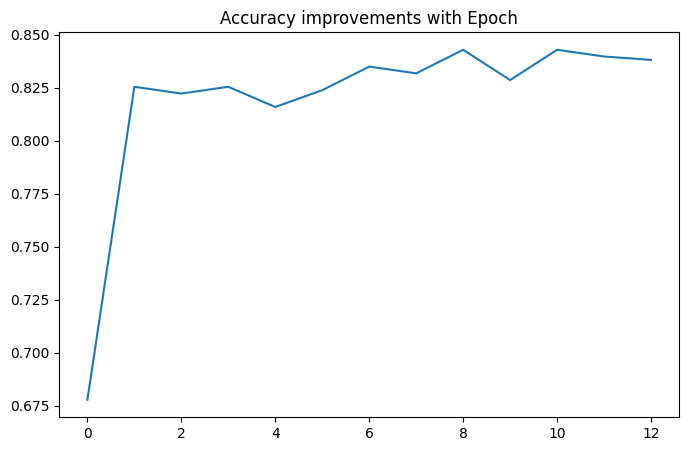


Evaluation against Test Dataset:
4/4 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8500
Test Loss: 0.36753708124160767, Test Accuracy: 0.8500000238418579


In [67]:
print("Accuracy during Training:")

# Plot accuracy of model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# Evaluate the model against the test dataset
print("\nEvaluation against Test Dataset:")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Our model looks pretty impressive! So, let's test it out.

# Prediction

We'll scale a synthetic prediction data and see if our model is able to predict the root cause error of this new data

In [68]:
# Synthetic prediction data
prediction_input = [[1, 1, 0, 0, 0, 1, 0]]

# Scale the prediction data to match the training data format
scaled_input = scaler.transform(prediction_input)

# The raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("The raw Prediction Output (Probabilities) :" , raw_prediction)

# The prediction in plain English
predicted_class = label_encoder.inverse_transform([raw_prediction.argmax()])
print(f'The root cause of the error: {predicted_class[0]}')

1/1 [==============================] - 0s 64ms/step
The raw Prediction Output (Probabilities) : [[0.8994229  0.09762593 0.00295111]]
The root cause of the error: DATABASE_ISSUE


And that's done and dusted! The data center team called and thanked me for building this amazing model. Now they're able to respond to these issues faster, making their customers very satisfied.

# THANK YOU FOR STICKING AROUND!